## Week 4:

New Topics:

* Reading data from Excel
* `geopandas` and choropleths
  
 Coding tasks:
  
  1. Create a choropleth showing the unemployment rate per county for each Tennessee county.
  2. Create a choropleth showing the SHADAC category for each county (adequate, low inadequate, and moderately inadequate).
  3. After creating the choropleth, you can start working on addressing the first two questions for TN Med Helper described in the project README. There are a few files in the data folder that can be helpful for this:
  * Medicare_Disparities_by_Population - This folder contains data obtained from the [Centers for Medicare and Medicaid Services](https://data.cms.gov/tools/mapping-medicare-disparities-by-population), as described in the README.
  * County_Health_Rankings - This folder contains the [2020 County Health Rankings](https://www.countyhealthrankings.org/).
  * Closures-Database-for-Web.xlsx, which contains a dataset of rural hospital closures, obtained from [UNC's Sheps Center](https://www.shepscenter.unc.edu/programs-projects/rural-health/rural-hospital-closures/). 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')

In [6]:
unemployment.head(5)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [7]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [8]:
counties.head(5)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


In [9]:
unemployment['Name'].str.split(' County', expand = True)

,0,1
0,Anderson,", TN"
1,Bedford,", TN"
2,Benton,", TN"
3,Bledsoe,", TN"
4,Blount,", TN"
...,...,...
90,Wayne,", TN"
91,Weakley,", TN"
92,White,", TN"
93,Williamson,", TN"


In [10]:
unemployment['NAME'] = unemployment['Name'].str.split(' County', expand = True)[0]

In [11]:
unemployment.head(5)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate,NAME
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9,Anderson
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2,Bedford
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2,Benton
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2,Bledsoe
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6,Blount


In [12]:
counties = pd.merge(left = counties, right = unemployment[['NAME', 'unemployment_rate']])

In [18]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [20]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OBJECTID           95 non-null     int64   
 1   NAME               95 non-null     object  
 2   KEY                95 non-null     object  
 3   SHAPE_AREA         95 non-null     float64 
 4   SHAPE_LEN          95 non-null     float64 
 5   geometry           95 non-null     geometry
 6   unemployment_rate  95 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 5.9+ KB


In [13]:
counties.head(5)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,unemployment_rate
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",4.3
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",5.3
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",5.2
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",4.8
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",5.6


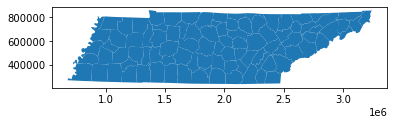

In [14]:
counties.plot();

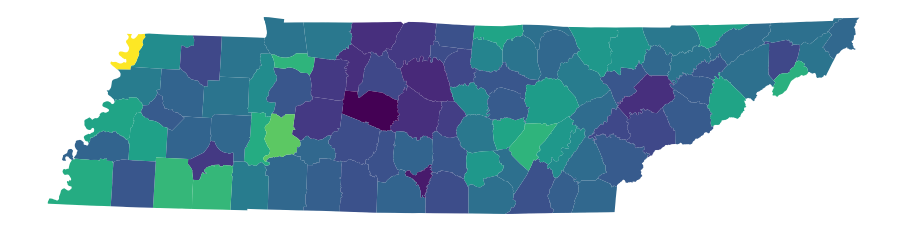

In [38]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate',
              ax = ax)
ax.axis('off');

In [39]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OBJECTID           95 non-null     int64   
 1   NAME               95 non-null     object  
 2   KEY                95 non-null     object  
 3   SHAPE_AREA         95 non-null     float64 
 4   SHAPE_LEN          95 non-null     float64 
 5   geometry           95 non-null     geometry
 6   unemployment_rate  95 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 5.9+ KB


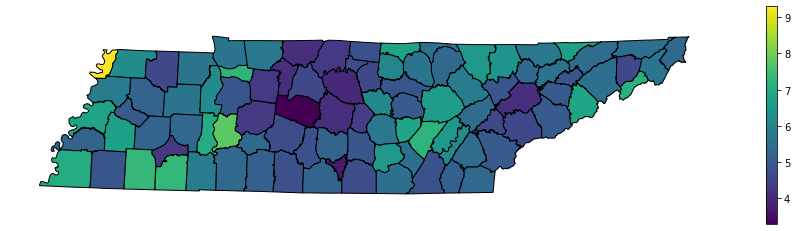

In [21]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

In [42]:
counties.describe()

,OBJECTID,SHAPE_AREA,SHAPE_LEN,unemployment_rate
count,95.000000,9.500000e+01,95.000000,95.000000
mean,48.000000,1.236650e+10,593217.622168,5.477895
std,27.568098,4.204828e+09,105841.271356,1.002993
min,1.000000,3.251823e+09,323651.877529,3.300000
25%,24.500000,8.988529e+09,522807.283729,4.800000
50%,48.000000,1.235278e+10,587707.705347,5.300000
75%,71.500000,1.571623e+10,650596.650470,6.050000
max,95.000000,2.185187e+10,926330.345521,9.300000


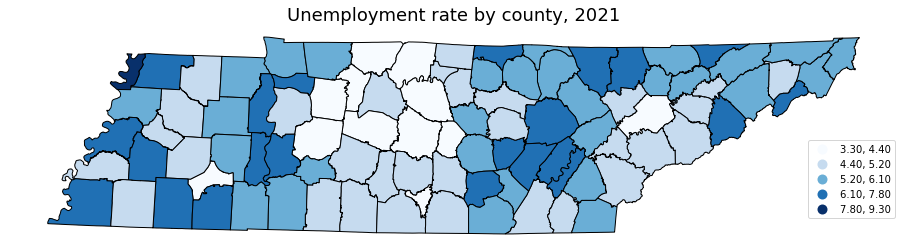

In [44]:
fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'unemployment_rate', 
              edgecolor = 'black', 
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Add a title
plt.title('Unemployment rate by county, 2021', fontsize = 18)

ax.axis('off');

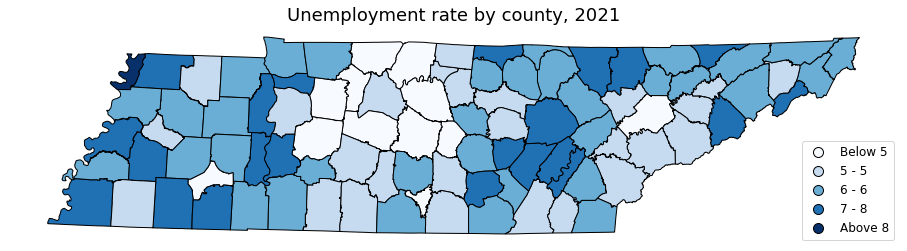

In [47]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'unemployment_rate', 
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

leg = ax.get_legend()

# Adjust the formatting of the legend
labels = []
n = len(leg.get_texts())
for i, lbl in enumerate(leg.get_texts()):
    label_text = lbl.get_text()
    lower = float(label_text.split()[0][:-1])
    upper = float(label_text.split()[1][:-1])
    if i == 0:
        new_text = "Below " + "{:,.0f}".format(upper + 1)
    elif i == n - 1:
        new_text = "Above " + "{:,.0f}".format(lower)
    else:
        new_text = "{:,.0f}".format(lower + 1) + " - " + "{:,.0f}".format(upper)
        
    labels.append(new_text)

# Adjust the marker appearance
# Extract the old markers and then modify by setting the edgecolor and edgewidth
markers = []
for line in leg.get_lines():
    marker = Line2D([0],[0], marker = 'o', 
                    markersize = line.get_markersize(), 
                    color = line.get_markerfacecolor(),
                    linestyle = 'None',
                    markeredgecolor = 'black',
                    markeredgewidth = 1)
    markers.append(marker)

# Redraw the legend with the new labels and markers
plt.legend(markers, labels, fontsize = 12)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
    
plt.title('Unemployment rate by county, 2021', fontsize = 18)

ax.axis('off');

In [4]:
phys_shadac = pd.read_csv('physicians_shadac.csv')

In [5]:
phys_shadac.head(5)

,FIPS,state_x,county_x,primary_care_physicians,population,county_y,state_y,urban,residents_per_pcp,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Anderson County,TENNESSEE,Urban,1950.282051,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Bedford County,TENNESSEE,Rural,3219.466667,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Benton County,TENNESSEE,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Bledsoe County,TENNESSEE,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Blount County,TENNESSEE,Urban,1443.633333,adequate


In [17]:
#Can also convert a regular dataframe to a Geo data frame
#counties = GeoDataFrame(counties)